In [52]:
import sys, os, importlib
sys.path.append(os.path.abspath('../'))
from wmhpypes.interfaces import ibbmTum

In [53]:
import importlib
importlib.reload(ibbmTum)

<module 'wmhpypes.interfaces.ibbmTum' from '/media/orco/home_data/Dokumente/DZNE/WMHpypes/wmhpypes/interfaces/ibbmTum.py'>

In [3]:
os.getcwd()

'/media/orco/home_data/Dokumente/DZNE/WMHpypes/examples'

In [44]:
test_data_dir = os.path.abspath('../test_data')
weights_dir = os.path.join(test_data_dir, 'model_FLAIR_only')
out_dir = os.path.join(test_data_dir, 'results_FLAIR_only')
wf_work_dir = os.path.join(test_data_dir, 'wf_work_dir')

In [45]:
flair = '/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/sub-test/sub-test_FLAIR.nii.gz'
weights = [os.path.abspath(os.path.join(weights_dir, i)) for i in os.listdir(weights_dir)]

In [6]:
os.path.isfile(weights[0])

True

In [ ]:
# Preprocessing

In [ ]:
p = ibbmTum.Preprocessing()

In [ ]:
p.inputs.cols_standard=200
p.inputs.rows_standard=200
p.inputs.flair = flair
p.inputs.thres = 30

In [ ]:
res = p.run()

In [ ]:
res.outputs

In [54]:
importlib.reload(ibbmTum)

<module 'wmhpypes.interfaces.ibbmTum' from '/media/orco/home_data/Dokumente/DZNE/WMHpypes/wmhpypes/interfaces/ibbmTum.py'>

In [73]:
# Predict
import numpy as np
predict_input = np.load('./preprocessed.npy')

In [74]:
# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1,
#                                                    inter_op_parallelism_threads=1)))

In [75]:
p = ibbmTum.Predict()

In [76]:
p.inputs.slice_shape = (200,200,1)
p.inputs.preprocessed_array = predict_input
p.inputs.weights = weights

In [77]:
predres = p.run()

48/48 [==============================] - 7s 146ms/step


In [50]:
#res.outputs.prediction

In [48]:
# Save prediction

In [81]:
sp = ibbmTum.SavePrediction()
sp.inputs.prediction_array = predres.outputs.prediction
spres = sp.run()

In [82]:
spres.outputs.prediction_nifti

'/media/orco/home_data/Dokumente/DZNE/WMHpypes/examples/prediction.nii.gz'

In [172]:
wmh_nii = '/home/orco/Documents/DZNE/WMHpypes/test_data/results_FLAIR_only/_sub-id_sub-test/prediction.nii.gz'

In [173]:
import nibabel as nib
img = nib.load(wmh_nii)

In [174]:
img.affine

array([[-1.,  0.,  0., -0.],
       [ 0., -1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [85]:
# Extract affine

In [86]:
from wmhpypes.interfaces import misc

In [108]:
import importlib
importlib.reload(misc)
ExtractAffine = misc.ExtractAffine

In [109]:
ea = ExtractAffine()

In [110]:
ea.inputs.in_nii = '/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/sub-test/sub-test_FLAIR.nii.gz'
#ea.inputs.output_filename = 'affine.mat'

In [111]:
eares = ea.run()

In [112]:
eares.outputs.out_matrix

array([[-9.53275442e-01,  9.80806947e-02, -2.18524262e-02,
         1.06058022e+02],
       [-8.63096491e-02, -8.67235959e-01, -1.24768543e+00,
         1.25458771e+02],
       [-4.71083708e-02, -3.95833969e-01,  2.72814965e+00,
        -4.64936924e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [113]:
eares.outputs.out_file

'/media/orco/home_data/Dokumente/DZNE/WMHpypes/examples/affine.mat'

In [132]:
# Save NIfTI

In [175]:
import importlib
importlib.reload(misc)
SaveNIfTI = misc.SaveNIfTI

In [176]:
sn = SaveNIfTI()
sn.inputs.in_array = wmh_nii
sn.inputs.in_header = '/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/sub-test/sub-test_FLAIR.nii.gz'
sn.inputs.in_matrix = np.loadtxt('affine.mat')
sn.inputs.out_filename = 'wmh_mask'
snres = sn.run()

sizeof_hdr should be 540; set sizeof_hdr to 540


In [177]:
import nilearn.plotting as plotting

In [178]:
nib.load('./wmh_mask.nii.gz')

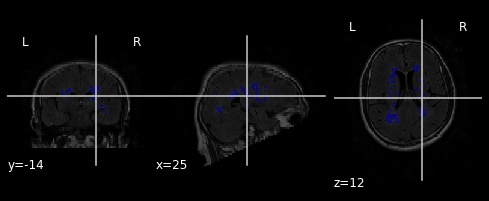

In [179]:
plotting.plot_roi('./wmh_mask.nii.gz', '/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/sub-test/sub-test_FLAIR.nii.gz')

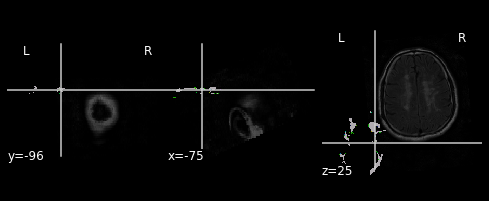

In [151]:
plotting.plot_roi('./prediction.nii.gz', '/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/sub-test/sub-test_FLAIR.nii.gz')